In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os


from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
import seaborn as sns
from catboost import CatBoostClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Read the dataset
heartData = pd.read_csv('/kaggle/input/heart-disease-prediction/heart_v2.csv')

In [ ]:
# Print first few rows of the dataset
heartData.head()

In [ ]:
# Checking for any missing data
heartData.info()

In [ ]:
# Visualizing the data for patterns
age_1 = len(heartData[heartData.age <= 18])
age_2 = len(heartData[(heartData.age > 19) & (heartData.age <= 40)])
age_3 = len(heartData[(heartData.age > 41) & (heartData.age <= 60)])
age_4 = len(heartData[heartData.age > 61])
x = ['<18','19-40','41-60','>60']
y = [age_1,age_2,age_3,age_4]
fig = plt.figure(figsize =(10, 7)) 
plt.bar(x, y) 
plt.show() 

### The above graph shows that there is a huge chunk of data about people in age of 41-60 with heart diseases. We dont have data for pediatric heart diseases

In [ ]:
# Visualizing the data for patterns
age_1 = len(heartData[heartData.age <= 18])
age_2_0 = len(heartData[(heartData.age > 19) & (heartData.age <= 40) & (heartData['heart disease'] ==0)])
age_2_1 = len(heartData[(heartData.age > 19) & (heartData.age <= 40) & (heartData['heart disease'] == 1)])

age_3_0 = len(heartData[(heartData.age > 41) & (heartData.age <= 60) & (heartData['heart disease'] == 0)])
age_3_1 = len(heartData[(heartData.age > 41) & (heartData.age <= 60) & (heartData['heart disease'] == 1)])

age_4_0 = len(heartData[(heartData.age > 61) & (heartData['heart disease'] == 0)])
age_4_1 = len(heartData[(heartData.age > 61) & (heartData['heart disease'] == 1)])

In [ ]:
labels = ['<18','19-40','41-60','>60']
HD =  [age_1,age_2_1,age_3_1,age_4_1]
DHD = [age_1,age_2_0,age_3_0,age_4_0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 7))
rects1 = ax.bar(x - width/2, HD, width, label='Have Heart Disease')
rects2 = ax.bar(x + width/2, DHD, width, label='Dont have Heart Disease')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_title('Age vs Suffering from Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Above graph shows that people in Ages 41-60 are more prone to heart diseases than people in the age group of above 60. This gives us more idea about the people in the dataset, are suffering from stress related heart diseases.

In [ ]:
# Visualizing the data for patterns
male = len(heartData[heartData.sex == 1])
female = len(heartData[heartData.sex == 0])

male_0 = len(heartData[(heartData.sex == 1) & (heartData['heart disease'] == 0)])
male_1 = len(heartData[(heartData.sex == 1) & (heartData['heart disease'] == 1)])

female_0 = len(heartData[(heartData.sex == 0) & (heartData['heart disease'] == 0)])
female_1 = len(heartData[(heartData.sex == 0) & (heartData['heart disease'] == 1)])

In [ ]:
labels = ['Male','Female']
HC =  [male_1,female_1]
DHC = [male_0,female_0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 7))
rects1 = ax.bar(x - width/2, HC, width, label='Have Heart Disease')
rects2 = ax.bar(x + width/2, DHC, width, label='Dont have Heart Disease')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_title('Gender vs Suffering from Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
heartData.BP.describe()

### From the below table we can see the various ranges and stages of Blood pressure. THe plots below show how people are suffering from heart diseases because of differnt types of BP

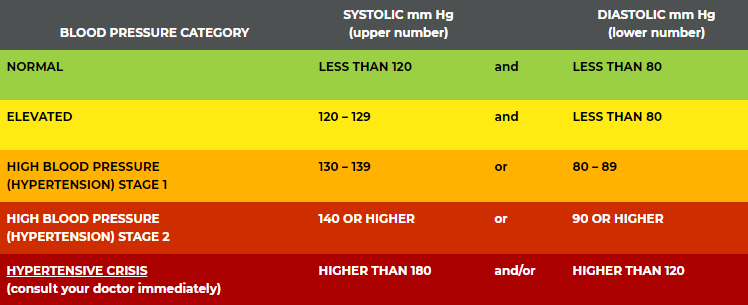

In [ ]:
bp_1 = len(heartData[heartData.BP < 120])
bp_2 = len(heartData[(heartData.BP >= 120) & (heartData.BP <= 129)])
bp_3 = len(heartData[(heartData.BP >= 130) & (heartData.BP <= 139)])
bp_4 = len(heartData[(heartData.BP >= 140) & (heartData.BP <= 179)])
bp_5 = len(heartData[(heartData.BP >= 180)])

x = ['Normal(<120)','Elevated(120-129)','High BP Stage 1(130-139)','High BP Stage(140-179)','Hypertensive Crisis']
y = [bp_1,bp_2,bp_3,bp_4,bp_5]
fig = plt.figure(figsize =(10, 7)) 
plt.xticks(rotation=45)
plt.bar(x, y) 
plt.show() 

In [ ]:
bp_1_0 = len(heartData[(heartData.BP < 120) & (heartData['heart disease'] == 0)])
bp_1_1 = len(heartData[(heartData.BP < 120) & (heartData['heart disease'] == 1)])

bp_2_0 = len(heartData[(heartData.BP >= 120) & (heartData.BP <= 129) & (heartData['heart disease'] == 0)])
bp_2_1 = len(heartData[(heartData.BP >= 120) & (heartData.BP <= 129) & (heartData['heart disease'] == 1)])


bp_3_0 = len(heartData[(heartData.BP >= 130) & (heartData.BP <= 139) & (heartData['heart disease'] == 0)])
bp_3_1 = len(heartData[(heartData.BP >= 130) & (heartData.BP <= 139) & (heartData['heart disease'] == 1)])

bp_4_0 = len(heartData[(heartData.BP >= 140) & (heartData.BP <= 179) & (heartData['heart disease'] == 0)])
bp_4_1 = len(heartData[(heartData.BP >= 140) & (heartData.BP <= 179) & (heartData['heart disease'] == 1)])

bp_5_0 = len(heartData[(heartData.BP >= 180) & (heartData['heart disease'] == 0)])
bp_5_1 = len(heartData[(heartData.BP >= 180) & (heartData['heart disease'] == 1)])

In [ ]:
labels = ['Normal(<120)','Elevated(120-129)','High BP Stage 1(130-139)','High BP Stage(140-179)','Hypertensive Crisis']

HC =  [bp_1_0,bp_2_0,bp_3_0,bp_4_0,bp_5_0]
DHC = [bp_1_1,bp_2_1,bp_3_1,bp_4_1,bp_5_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 7))
rects1 = ax.bar(x - width/2, HC, width, label='Have Heart Disease')
rects2 = ax.bar(x + width/2, DHC, width, label='Dont Have Heart Disease')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_title('BP vs Suffering from Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
cl_1_0 = len(heartData[(heartData.cholestrol <= 150) & (heartData['heart disease'] == 0)])
cl_1_1 = len(heartData[(heartData.cholestrol <= 150) & (heartData['heart disease'] == 1)])

cl_2_0 = len(heartData[(heartData.cholestrol >= 151) & (heartData.cholestrol <= 199) &  (heartData['heart disease'] == 0) ])
cl_2_1 = len(heartData[(heartData.cholestrol >= 151) & (heartData.cholestrol <= 199) &  (heartData['heart disease'] == 1) ])

cl_3_0 = len(heartData[(heartData.cholestrol >= 200) & (heartData.cholestrol <= 499) &  (heartData['heart disease'] == 0) ])
cl_3_1 = len(heartData[(heartData.cholestrol >= 200) & (heartData.cholestrol <= 499) &  (heartData['heart disease'] == 1) ])

cl_4_0 = len(heartData[(heartData.cholestrol >= 500) &  (heartData['heart disease'] == 0) ])
cl_4_1 = len(heartData[(heartData.cholestrol >= 500) &  (heartData['heart disease'] == 1) ])


### The Triglyceride levels are generally indicative of the levels of Cholestorl. Below table illustrates the ranges
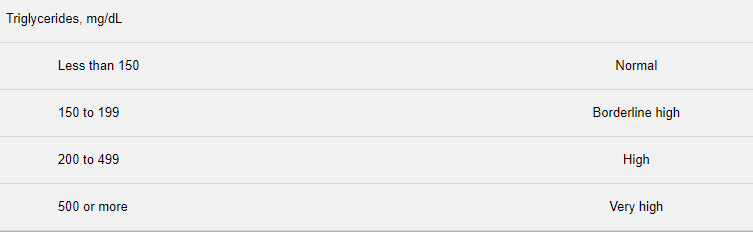

In [ ]:
labels = ['Normal(<150)','Borderline High(150-199)','High(200-499)','Very High']

HC =  [cl_1_0,cl_2_0,cl_3_0,cl_4_0]
DHC = [cl_1_1,cl_2_1,cl_3_1,cl_4_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 7))
rects1 = ax.bar(x - width/2, HC, width, label='Have Heart Disease')
rects2 = ax.bar(x + width/2, DHC, width, label='Dont Have Heart Disease')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_title('Cholestrol vs Suffering from Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(heartData.corr(), annot = True, cmap="rainbow")
plt.show()

### As we can see from the above correlation table. All the provided features have very less correlation with the target variable. Hence, there is a high possiblity that the modelling accuracy will be low.

In [ ]:
heartData_1 = heartData.iloc[0:250]
X = heartData_1.drop("heart disease", axis=1)
y = heartData_1["heart disease"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
cat_features = list(range(0, X.shape[1]))
print(cat_features)

In [ ]:
clf = CatBoostClassifier(
    iterations=20, 
    learning_rate=0.5, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

In [ ]:
print(clf.predict_proba(data=X_val))

In [ ]:
print(clf.predict(data=X_val))

In [ ]:
heartData_2 = heartData.iloc[251:269]
X_test = heartData_2.drop("heart disease", axis=1)
y_test = heartData_2["heart disease"]

In [ ]:
y_pred = clf.predict(data=X_test)
print(1 - (np.sum(np.abs(y_pred-y_test))/len(X_test)))

### WIth CATBOOST approach we achieve an accuracy of 72% for totally unseen data points.